# Weekly assignment 1: exploratory data analysis

Read in and merge the two data sets

In [1]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

df1 = pd.read_csv('steps.csv', sep = ';')
df1.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df2 = pd.read_csv('survey.csv')
df2.head()


,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


I merged both datasets with a common identifier

In [3]:
df = pd.merge(df1, df2, on = 'id') #'id' is the common identifier
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
df['weight'].value_counts() #Get all the values. This may be less useful when there are many values.

72.0     40
65.0     35
73.0     32
80.0     31
55.0     31
         ..
116.0     1
128.0     1
115.0     1
101.0     1
20.0      1
Name: weight, Length: 72, dtype: int64

remove impossible values & show visualisations

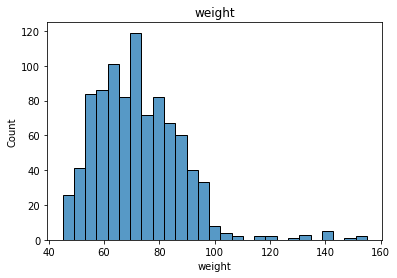

In [5]:
df['weight'] = df['weight'].apply(pd.to_numeric, errors='coerce')
def above_200(x):
    if(x > 200.0 or x < 40): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_200)

sns.histplot(df['weight'].dropna(), kde=False) #Selecting the rating column. I need to drop the NA's for the plot
plt.title('weight')
plt.xlabel('weight')
plt.show()

C:\Users\monzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


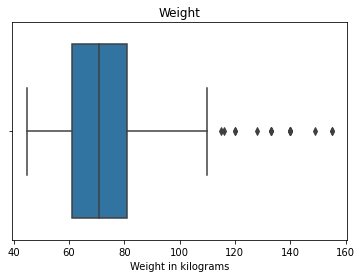

In [6]:
sns.boxplot(df['weight'])
plt.title('Weight')
plt.xlabel('Weight in kilograms')
plt.show()

Create the variable mean steps per participant

In [7]:
df['mean_step'] = df.loc[:, '20-6-2013' : '13-5-2014'].mean(axis = 1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_step
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


I visualized the data with a boxplot to quickly find the outliers

C:\Users\monzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


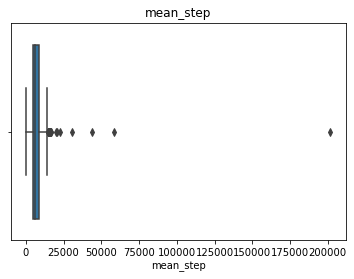

In [8]:
sns.boxplot(df['mean_step'])
plt.title('mean_step')
plt.xlabel('mean_step')
plt.show()

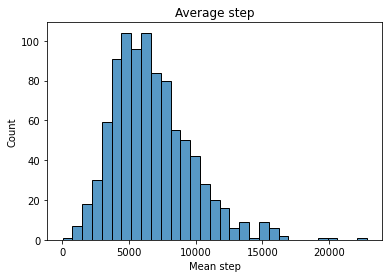

In [9]:
df['mean_step'] = df['mean_step'].apply(pd.to_numeric, errors='coerce')
def above_25000(x):
    if(x > 25000): #with this I removed the outliers
        return float('NaN')
    else: 
        return x
df['mean_step'] = df['mean_step'].apply(above_25000)

df['mean_step'].name = 'Mean step' #Labeling the variable for plotting
age = df['mean_step'].dropna() #Selecting the size column. I need to drop the NA's, otherwise Seaborn won't plot
sns.histplot(age, kde=False) 
plt.title('Average step')
plt.show() 

used different graphs to show the distribution

C:\Users\monzi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\monzi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


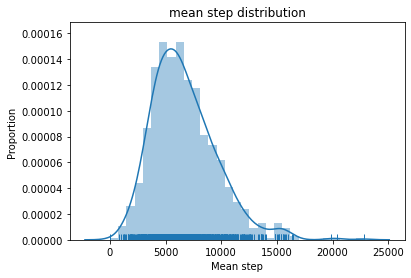

In [10]:
sns.distplot(df['mean_step'], rug=True)
plt.title('mean step distribution')
plt.xlabel('Mean step')
plt.ylabel('Proportion')
plt.show()

I showed a Summary of statistics

In [11]:
df['mean_step'].describe()

count      921.000000
mean      6703.996351
std       2948.662012
min          4.000000
25%       4634.372549
50%       6240.073034
75%       8327.528037
max      22842.716846
Name: Mean step, dtype: float64

The distribution is normal, has 1 peak and is right skewed 

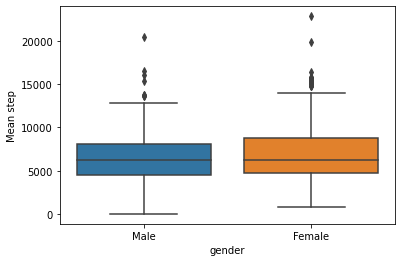

In [12]:
sns.boxplot(x ="gender", y="mean_step", data=df)
plt.show()

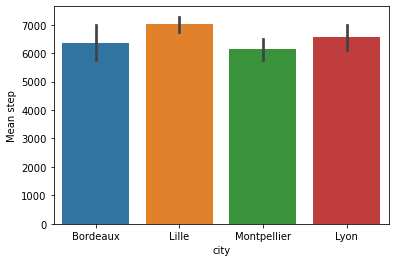

In [13]:
sns.barplot(x = 'city', y = 'mean_step', data = df)
plt.show()


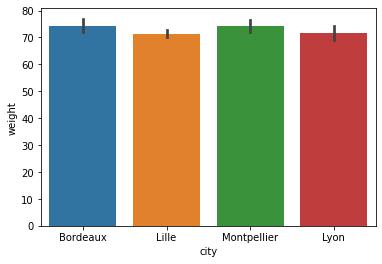

In [14]:
sns.barplot(x = 'city', y = 'weight', data = df)
plt.show()


1. The distribution of mean steps for women is greater than for men. 
2. People in Lille have the highest mean step, followed by Lyon. 
3. People in Lille show the lowest weight, followed by Lyon.  

You could conclude from this: 'the higher the average weight, the lower the mean steps', but we need to investigate further

# Weekly assignment 2: correlation

First I will be exploring different variables, some are numbers, others categories

In [15]:
df2= df[['weight', 'gender', 'mean_step', 'height', 'age', 'hh_size', 'city', 'education', 'education_1', 'id']]
df2.head()


,weight,gender,mean_step,height,age,hh_size,city,education,education_1,id
0,98.0,Male,10205.521212,178.0,25-34,4,Bordeaux,4,Master or doctorate,1
1,77.0,Male,5687.423313,180.0,35-44,1,Lille,3,Bachelor,2
2,83.0,Male,8301.729730,180.0,25-34,2,Montpellier,2,Master or doctorate,3
3,80.0,Male,3633.200000,178.0,<25,1,Lyon,1,Bachelor,4
4,61.0,Female,5312.129630,167.0,25-34,3,Montpellier,4,Bachelor,5


I changed gender and city values into numerical values

In [16]:
dummies= pd.get_dummies(df2['gender'])
df2= pd.concat([df2, dummies],axis =1)
df2.head()
#create dummie for gender

,weight,gender,mean_step,height,age,hh_size,city,education,education_1,id,Female,Male
0,98.0,Male,10205.521212,178.0,25-34,4,Bordeaux,4,Master or doctorate,1,0,1
1,77.0,Male,5687.423313,180.0,35-44,1,Lille,3,Bachelor,2,0,1
2,83.0,Male,8301.729730,180.0,25-34,2,Montpellier,2,Master or doctorate,3,0,1
3,80.0,Male,3633.200000,178.0,<25,1,Lyon,1,Bachelor,4,0,1
4,61.0,Female,5312.129630,167.0,25-34,3,Montpellier,4,Bachelor,5,1,0


In [17]:
dummies2 = pd.get_dummies(df2['city'])
df2= pd.concat([df2, dummies2],axis =1)
df2.head()
#create dummie for city

,weight,gender,mean_step,height,age,hh_size,city,education,education_1,id,Female,Male,Bordeaux,Lille,Lyon,Montpellier
0,98.0,Male,10205.521212,178.0,25-34,4,Bordeaux,4,Master or doctorate,1,0,1,1,0,0,0
1,77.0,Male,5687.423313,180.0,35-44,1,Lille,3,Bachelor,2,0,1,0,1,0,0
2,83.0,Male,8301.729730,180.0,25-34,2,Montpellier,2,Master or doctorate,3,0,1,0,0,0,1
3,80.0,Male,3633.200000,178.0,<25,1,Lyon,1,Bachelor,4,0,1,0,0,1,0
4,61.0,Female,5312.129630,167.0,25-34,3,Montpellier,4,Bachelor,5,1,0,0,0,0,1


I made a scatterplot matrix 

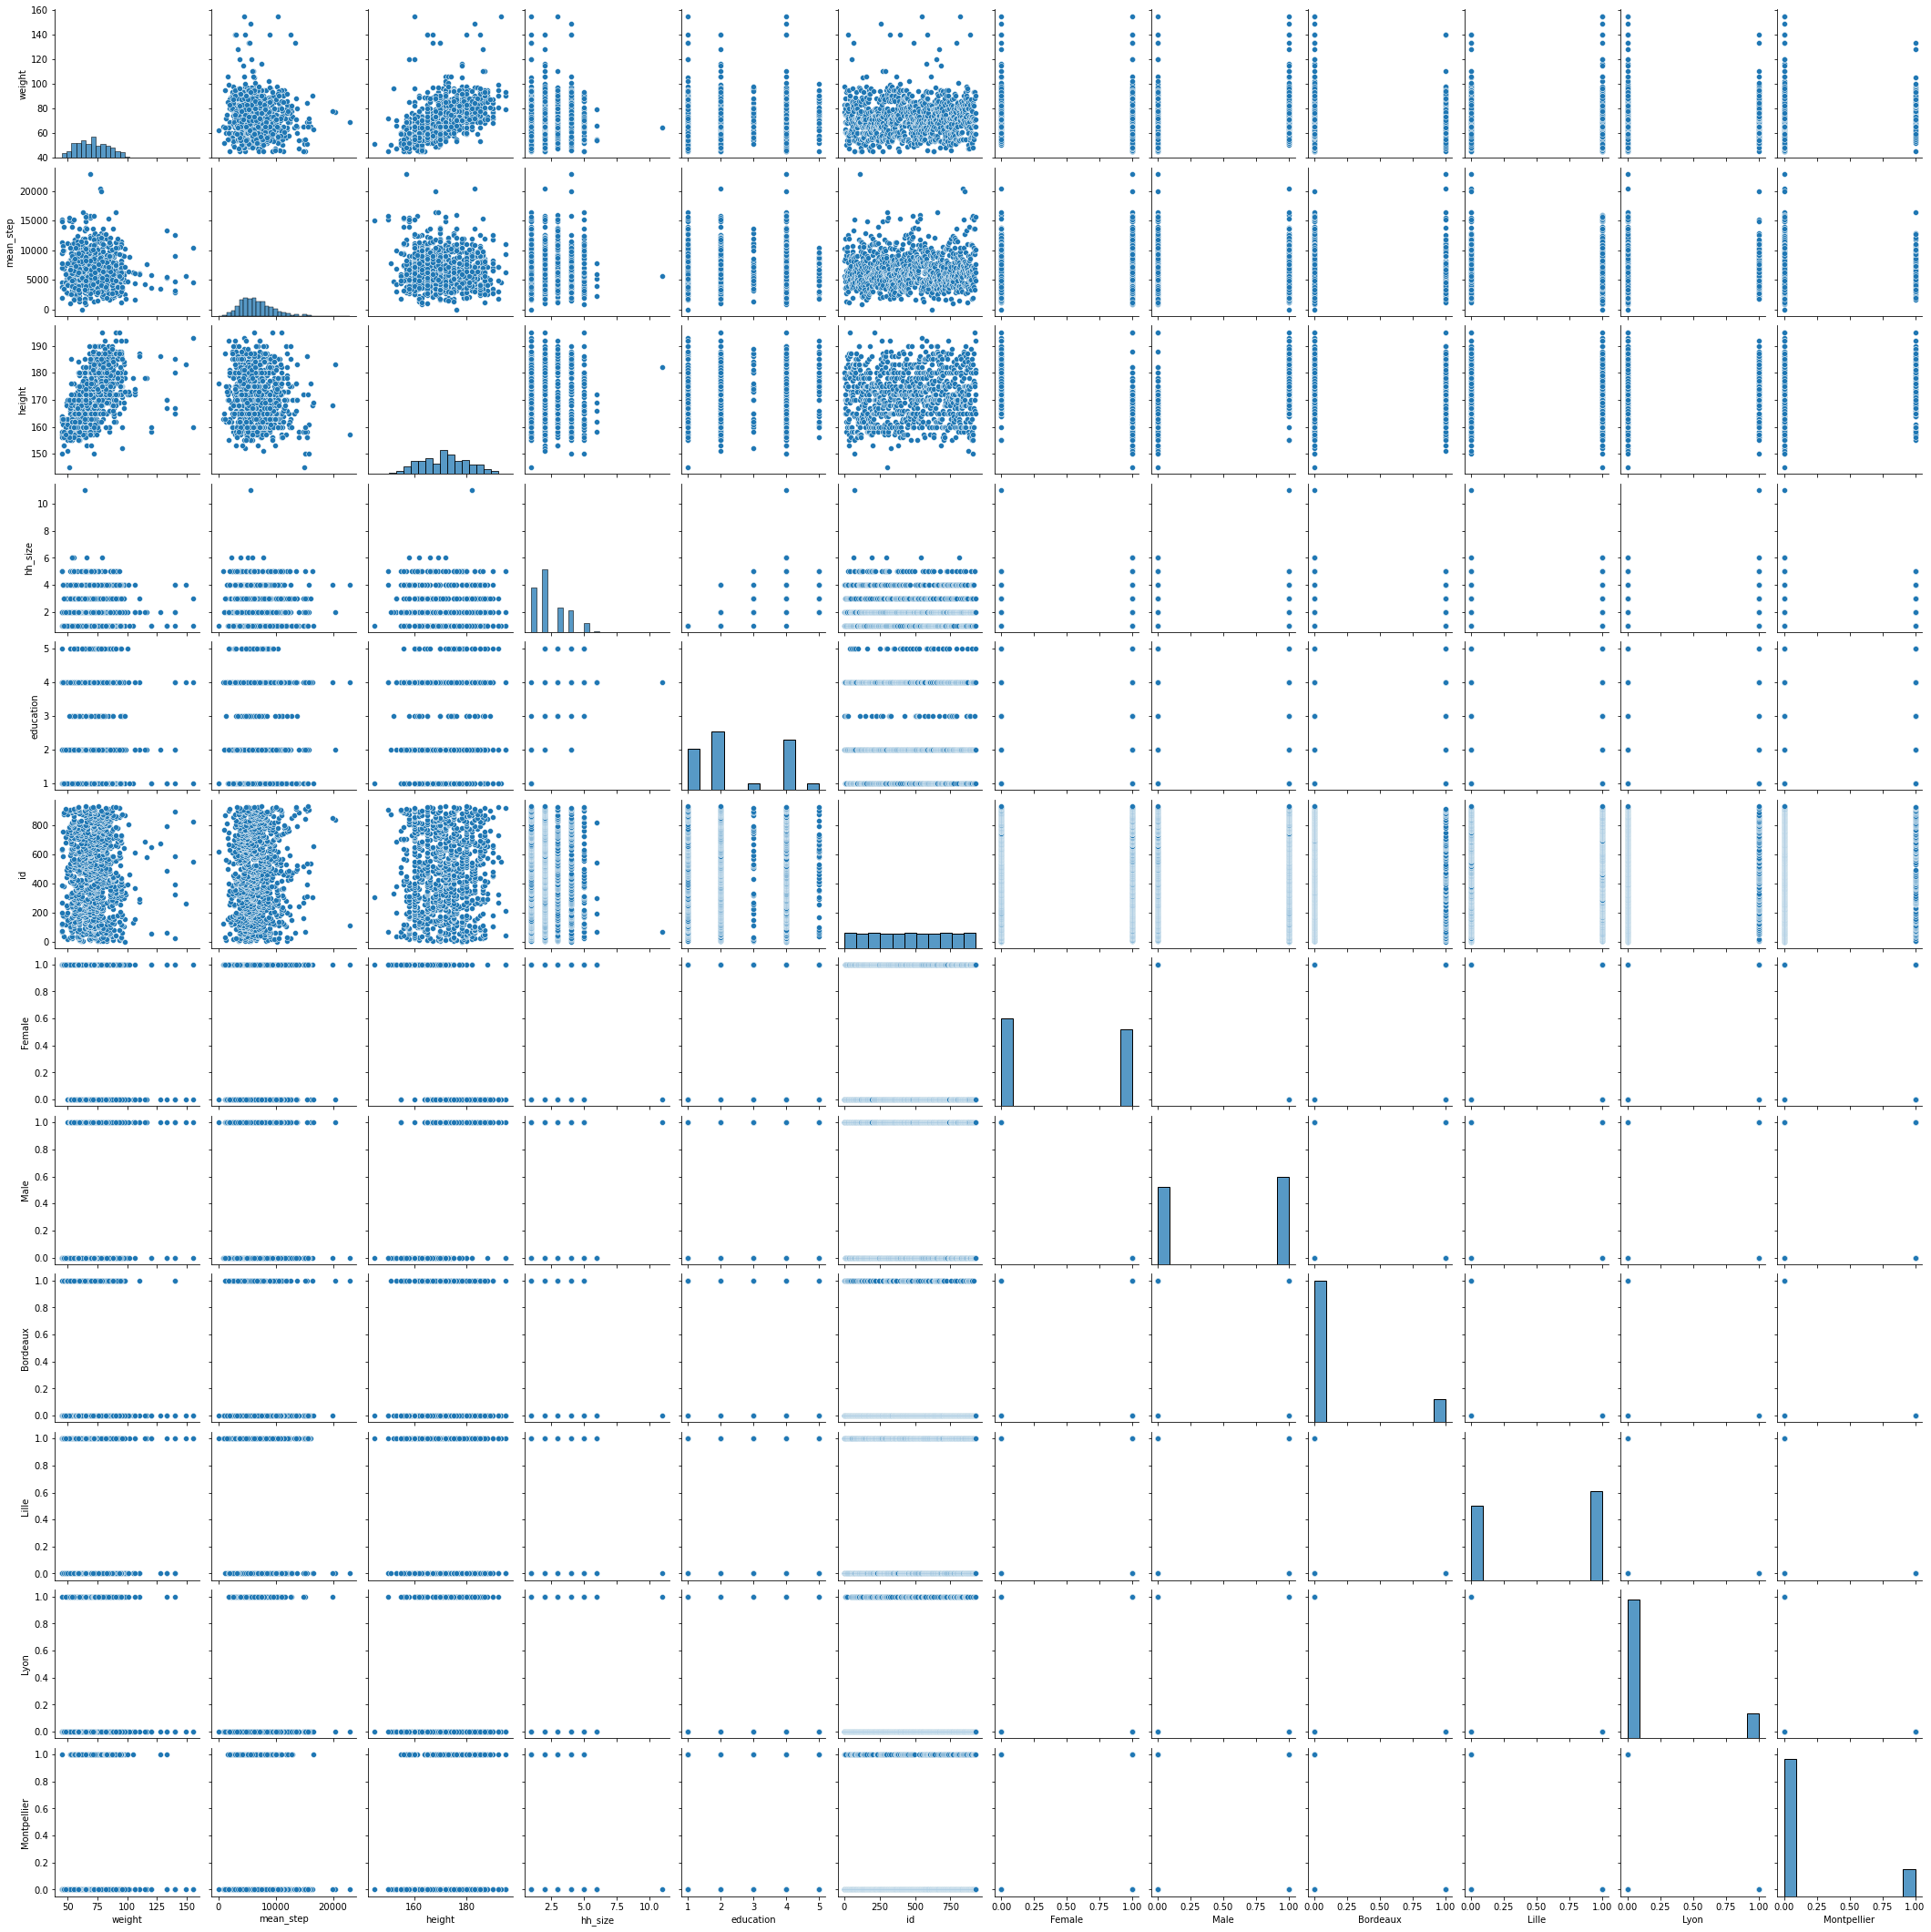

In [18]:
sns.pairplot(df2)

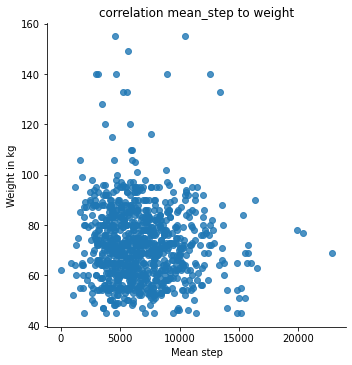

In [19]:
sns.lmplot(x='mean_step', y='weight', fit_reg=False, data=df2) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Mean step') #use matplotlib to refine Seaborn plot
plt.ylabel('Weight in kg')
plt.title('correlation mean_step to weight')
plt.show()

There might be a weak non-linear correlation between mean step and weight

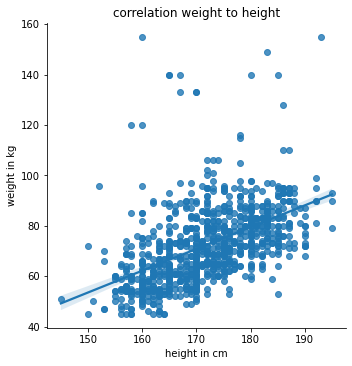

In [20]:
sns.lmplot(x='height', y='weight', data=df2) #fit_reg=False leaves out the regression line; see below
plt.xlabel('height in cm') #use matplotlib to refine Seaborn plot
plt.ylabel('weight in kg')
plt.title('correlation weight to height')
plt.show()

There seems to me a positive, linear correlation between weight and height. 
>> Linear regression is used to predict the value of a dependent variable based on other variables. In this case, when someone has a greater height, you can espect a greater weight 

In [21]:
corr = df2.corr() #check to see the numbers
corr

,weight,mean_step,height,hh_size,education,id,Female,Male,Bordeaux,Lille,Lyon,Montpellier
weight,1.000000,-0.063273,0.508194,0.005652,0.008233,0.010215,-0.419563,0.419563,0.054656,-0.066804,-0.018677,0.056833
mean_step,-0.063273,1.000000,-0.086249,0.040943,0.023946,0.035712,0.066559,-0.066559,-0.047888,0.114293,-0.022048,-0.087249
height,0.508194,-0.086249,1.000000,-0.059704,-0.046343,0.028926,-0.713257,0.713257,0.020873,-0.089797,-0.001606,0.102647
hh_size,0.005652,0.040943,-0.059704,1.000000,0.825585,-0.022413,0.026577,-0.026577,-0.013100,-0.024448,0.135214,-0.086138
education,0.008233,0.023946,-0.046343,0.825585,1.000000,-0.007893,0.012117,-0.012117,-0.023112,0.023765,0.071963,-0.080184
id,0.010215,0.035712,0.028926,-0.022413,-0.007893,1.000000,-0.042834,0.042834,-0.042309,0.027560,-0.017200,0.019122
Female,-0.419563,0.066559,-0.713257,0.026577,0.012117,-0.042834,1.000000,-1.000000,-0.027471,0.071616,-0.002943,-0.067708
Male,0.419563,-0.066559,0.713257,-0.026577,-0.012117,0.042834,-1.000000,1.000000,0.027471,-0.071616,0.002943,0.067708
Bordeaux,0.054656,-0.047888,0.020873,-0.013100,-0.023112,-0.042309,-0.027471,0.027471,1.000000,-0.438241,-0.170572,-0.178305
Lille,-0.066804,0.114293,-0.089797,-0.024448,0.023765,0.027560,0.071616,-0.071616,-0.438241,1.000000,-0.463575,-0.484594


There seems to be a strong correlation with between weight and height. Not so much with mean Step. 

# Week 3: linear regression

In [22]:
y = df2['weight'] #We need to take out the weight as our Y-variable
X = df2[['height', 'mean_step','hh_size', 'education', 'Female']] # Select the variables I want to use to predict the weight, I already made dummies
X.index = df2['id'] 
X.head()

,height,mean_step,hh_size,education,Female
id,,,,,
1,178.0,10205.521212,4,4,0
2,180.0,5687.423313,1,3,0
3,180.0,8301.729730,2,2,0
4,178.0,3633.200000,1,1,0
5,167.0,5312.129630,3,4,1


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,height,mean_step,hh_size,education,Female
id,,,,,
67,170.0,8069.644928,3,4,1
743,170.0,9189.738095,2,2,0
365,168.0,4790.027027,2,2,1
369,159.0,8998.067227,2,2,1
804,160.0,9518.512605,2,2,1


In [24]:
df2 = df2.dropna() #first get rid of rows with empty cells
df2.head()

from sklearn.preprocessing import normalize
X = df2[['height', 'mean_step','hh_size', 'education', 'Female']] #create the X matrix
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df2['weight'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [25]:

lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [26]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.12389697695816582

R2 = the variance in the dependent variable explained by the model/ total variance 
In short; R2 is the total variance we can explain. 
>> Which means that the variation that we can explain is only 12%, therefore the model cannot be trusted

In [27]:
import math
math.sqrt(mean_squared_error(y_test, y_test_p))

15.058583897452783

Root mean squared error is used to see by how much the prediction is typically off. In this case its typically off by more than 15 kg